### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

### Вариант №20

Контрольная работа 4 – Вариант 20 

1. Набор данных: penguins 

2. Независимые признаки: V0, V3 

3. Метка класса: species 

4. Показатель бинарной классификации: 

𝐹𝑃 (False Positives) – число точек в отрицательном классе, ошибочно спрогнозированных в положительный класс 

5. Параметры нейронных сетей: 

Кол-во скрытых слоев: 5 

Кол-во нейронов в слое: 32 

Оптимизаторы: Adadelta, Adam, RMSprop 

Функция активации в скрытых слоях: swish 

 

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса. Оставьте в наборе признаки, принимающие числовые значения.
2. Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.
3. Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.
4. Разбейте набор данных из двух признаков и бинарных меток класса на обучающую и тестовую выборки. Постройте нейронные сети с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите их на обучающей выборке, контролируя процесс обучения нейронных сетей. Определите нейронную сеть с более высоким качеством бинарной классификации по показателю бинарной классификации, указанному в индивидуальном задании.
5. Визуализируйте границы принятия решений построенных нейронных сетей на отдельных рисунках на всем наборе данных из двух признаков и бинарных меток классов.
6. Визуализируйте на одном рисунке ROC-кривые для построенных классификаторов на основе нейронных сетей, вычислите площади под ROC-кривыми методом трапеций или иным методом и создайте легенду с указанием площадей кривых.
7. Определите исходном наборе данных дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и имеющий максимальную дисперсию.
8. Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.
9. Разбейте исходный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть для многоклассовой классификации с нормализующим слоем и параметрами, соответствующими лучшей нейронной сети для бинарной классифиации из п.4, и обучите ее на обучающей выборке, контролируя процесс ее обучения.
10. Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.


# 1. датасет

In [1]:
# %pip install -q tensorflow
# %pip install -q matplotlib
# %pip install -q pandas
# %pip install -q tfds-nightly
# %pip install -q jinja2
# %pip install -q scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

2024-05-09 01:58:56.767521: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 01:58:56.771652: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 01:58:56.823591: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 01:58:57.856222: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
ds = tfds.load("penguins", split='train')
df = tfds.as_dataframe(ds)
len(df)

2024-05-09 01:59:05.550830: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-05-09 01:59:05.745339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


334

In [3]:
for i in range(4):
    df['V'+str(i)] = df['features'].apply([lambda x:x[i]])
df.head()

,features,species,V0,V1,V2,V3
0,"[0.6545454, 0.22619048, 0.89830506, 0.6388889]",2,0.654545,0.226190,0.898305,0.638889
1,"[0.36, 0.04761905, 0.6440678, 0.4027778]",2,0.360000,0.047619,0.644068,0.402778
2,"[0.68, 0.30952382, 0.91525424, 0.6944444]",2,0.680000,0.309524,0.915254,0.694444
3,"[0.6181818, 0.20238096, 0.8135593, 0.6805556]",2,0.618182,0.202381,0.813559,0.680556
4,"[0.5527273, 0.26190478, 0.84745765, 0.7083333]",2,0.552727,0.261905,0.847458,0.708333


# 2. распределение исходных данных

/tmp/ipykernel_342296/2852537563.py:4: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  fig = df.plot.scatter(ind1, ind2, color=df[species], colormap='cool')


Text(0.5, 1.0, 'Распределение по видам')

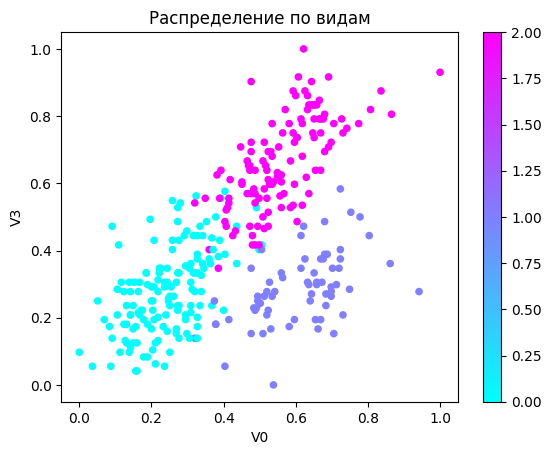

In [4]:
ind1 = 'V0'
ind2 = 'V3'
species = 'species'
fig = df.plot.scatter(ind1, ind2, color=df[species], colormap='cool')
fig.set_title("Распределение по видам")

# 3. объединение классов

Объединяем классы 0 и 2.

In [5]:
df[species] = df[species].map(lambda x: [0,1,0][x])

/tmp/ipykernel_342296/3175780331.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  fig = df.plot.scatter(ind1, ind2, color=df[species], colormap='bwr')


Text(0.5, 1.0, 'Распределение по видам после объединения')

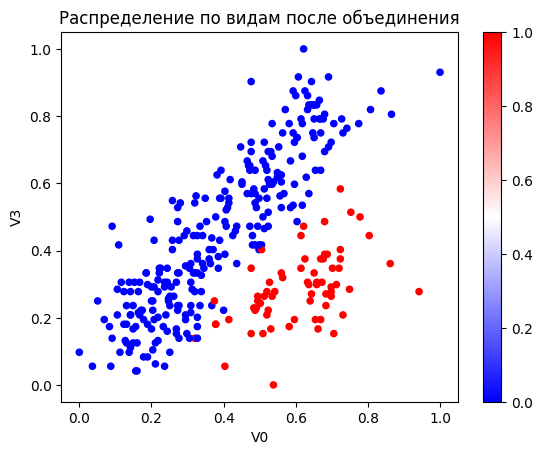

In [6]:
fig = df.plot.scatter(ind1, ind2, color=df[species], colormap='bwr')
fig.set_title("Распределение по видам после объединения")

# 4. подготовка нейросети

In [7]:
import random
random.seed('Генералов Даниил')
test_ratio = 0.5

train = pd.DataFrame(columns=df.columns)
test = pd.DataFrame(columns=df.columns)
for row_idx in range(len(df)):
    row = df.loc[row_idx, :]
    if random.random() < test_ratio:
        test.loc[len(test), :] = row
    else:
        train.loc[len(train), :] = row

len(train), len(test)

(159, 175)

In [8]:
train_input = pd.DataFrame(train, columns=[ind1, ind2])
test_input = pd.DataFrame(test, columns=[ind1, ind2])
full_input = pd.DataFrame(df, columns=[ind1, ind2])

train_output = pd.DataFrame(train, columns=[species])
test_output = pd.DataFrame(test, columns=[species])
full_output = pd.DataFrame(df, columns=[species])

In [9]:
train_input = np.asarray(train_input).astype(np.float32)
train_output = np.asarray(train_output).astype(np.float32)
test_input = np.asarray(test_input).astype(np.float32)
test_output = np.asarray(test_output).astype(np.float32)

full_input = np.asarray(full_input).astype(np.float32)
full_output = np.asarray(full_output).astype(np.float32)

In [10]:
normer = tf.keras.layers.Normalization()
normer.adapt(train_input)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=train_input[0].shape),
    normer,
    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 2)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,358 (17.03 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 5 (24.00 B)

In [11]:
# адаптировано из https://keras.io/api/metrics/
from tensorflow.keras import ops
class BinaryFalsePositives(tf.keras.metrics.Metric):

  def __init__(self, name='binary_false_positives', **kwargs):
    super().__init__(name=name, **kwargs)
    self.false_positives = self.add_weight(name='fp', initializer='zeros')

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = ops.cast(y_true, "bool")
    y_pred = ops.cast(y_pred, "bool")

    # this returns true iff y_true is unequal to y_pred
    # probably there's a better way but I don't know what the ops module contains
    values = ops.logical_xor(ops.equal(1, 1), ops.equal(y_pred, y_true))

    values = ops.cast(values, self.dtype)
    if sample_weight is not None:
      sample_weight = ops.cast(sample_weight, self.dtype)
      values = values * sample_weight
    self.false_positives.assign_add(ops.sum(values))

  def result(self):
    return self.false_positives

  def reset_states(self):
    self.false_positives.assign(0)


In [12]:
def clamp(data):
    # print(data)
    return np.round(data)

def FP(y_true, y_predict):
    assert (y_true).shape == (y_predict).shape
    y_pred_clamp = clamp(y_predict)
    return np.sum((y_true == 0) & (y_pred_clamp == 1))

def TN(y_true, y_predict):
    assert (y_true).shape == (y_predict).shape
    y_pred_clamp = clamp(y_predict)
    return np.sum((y_true == 0) & (y_pred_clamp == 0))

def fpr_score(y_true, y_predict):
    fp = FP(y_true, y_predict)
    tn = TN(y_true, y_predict)
    try:
        return fp / (fp + tn)
    except:
        return 0.0

In [13]:
model_adadelta = tf.keras.models.clone_model(model)
model_adam = tf.keras.models.clone_model(model)
model_rmsprop = tf.keras.models.clone_model(model)

model_adadelta.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.1),
                metrics = ['accuracy', 'false_positives'])

model_adam.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['accuracy', 'false_positives'])

model_rmsprop.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01),
                metrics = ['accuracy', 'false_positives'])

In [14]:
adadelta_history = model_adadelta.fit(train_input, train_output, epochs=500, verbose=0)

In [15]:
adam_history = model_adam.fit(train_input, train_output, epochs=500, verbose=0)

In [16]:
rmsprop_history = model_rmsprop.fit(train_input, train_output, epochs=500, verbose=0)

In [17]:
# подсчет false positive
adadelta_pred = model_adadelta.predict(full_input)
adadelta_score = FP(full_output, adadelta_pred)

adam_pred = model_adam.predict(full_input)
adam_score = FP(full_output, adam_pred)

rmsprop_pred = model_rmsprop.predict(full_input)
rmsprop_score = FP(full_output, rmsprop_pred)

print("Adadelta:", adadelta_score)
print("Adam:", adam_score)
print("RMSprop:", rmsprop_score)

best_optimizer = model_adadelta.optimizer
best_score = adadelta_score
if adam_score <= best_score:
    best_score = adam_score
    best_optimizer = model_adam.optimizer

if rmsprop_score <= best_score:
    best_score = rmsprop_score
    best_optimizer = model_rmsprop.optimizer

print("Лучший оптимизатор:", best_optimizer, 'с ошибками:', best_score)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Adadelta: 2
Adam: 5
RMSprop: 2
Лучший оптимизатор: <keras.src.optimizers.rmsprop.RMSprop object at 0x7d00f335a4d0> с ошибками: 2


# 5. границы принятия решения

In [18]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()]
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Проверка мультиклассовости
    if len(y_pred[1]) > 1:
        # мультиклассовая классификация
        # изменяем форму прогноза для визуализации
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # бинарная классификация
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

  1/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step


Text(0.5, 1.0, 'Модель с Adadelta')

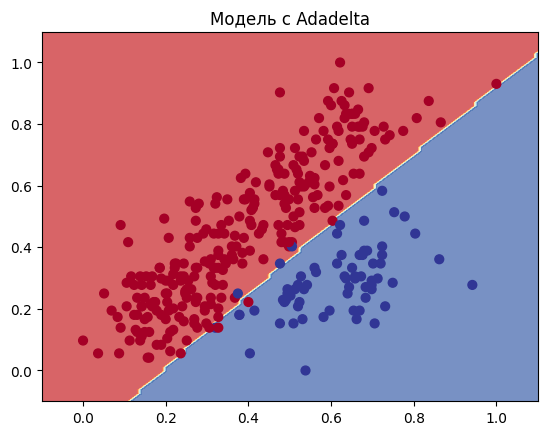

In [19]:
plot_decision_boundary(model_adadelta, full_input, full_output)
plt.title("Модель с Adadelta")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step


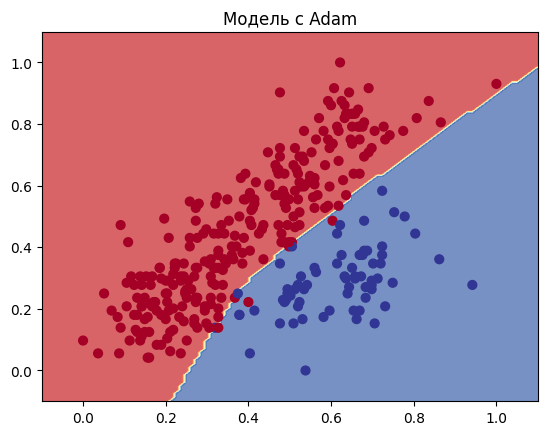

In [20]:
plt.title("Модель с Adam")
plot_decision_boundary(model_adam, full_input, full_output)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


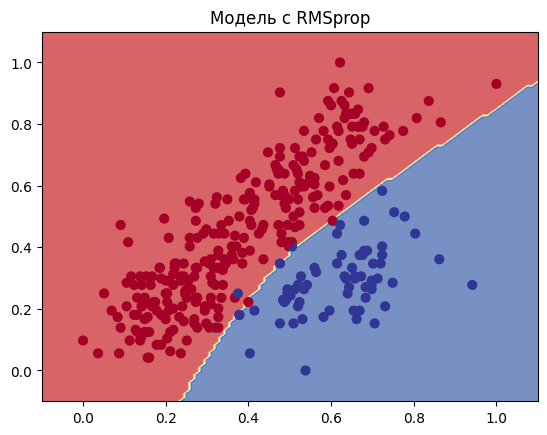

In [21]:
plt.title("Модель с RMSprop")
plot_decision_boundary(model_rmsprop, full_input, full_output)

# 6. ROC-анализ

In [22]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):

        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])

    return roc.reshape(-1, 2)



In [23]:
full_prediction = model_adam.predict(full_input)
full_prediction.shape

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


(334, 1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


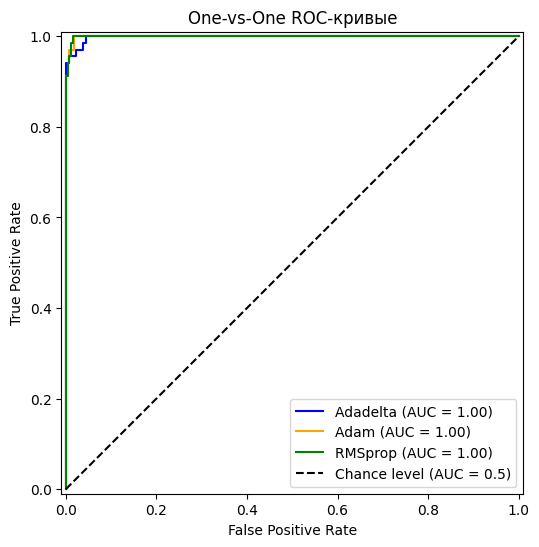

In [24]:
from sklearn.metrics import RocCurveDisplay

fig, ax1 = plt.subplots(figsize=(6, 6))
models = {
    'Adadelta': model_adadelta,
    'Adam': model_adam,
    'RMSprop': model_rmsprop,
}

colors = iter(['blue', 'orange', 'green'])
for name, model in models.items():
    full_prediction = model.predict(full_input)
    RocCurveDisplay.from_predictions(
        full_output[:],
        full_prediction[:],
        name=f"{name}",
        color=next(colors),
        ax=ax1,
        plot_chance_level=name=='RMSprop',
    )

_ = ax1.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-One ROC-кривые",
)

# 7. поиск альтернативного признака

In [25]:
df.describe()

,species,V0,V1,V2,V3
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,0.203593,0.432520,0.483390,0.491779,0.419183
std,0.403274,0.198564,0.234275,0.237664,0.223566
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.269091,0.297619,0.305085,0.236111
50%,0.000000,0.450909,0.500000,0.423729,0.375000
75%,0.000000,0.599091,0.666667,0.694915,0.581597
max,1.000000,1.000000,1.000000,1.000000,1.000000


Макс. дисперсия у `V2` (0.237664)

In [26]:
ind3 = 'V2'

In [27]:
# загружаем датасет заново, потому что мы стерли один из классов выше
ds = tfds.load("penguins", split='train')
df = tfds.as_dataframe(ds)
for i in range(4):
    df['V'+str(i)] = df['features'].apply([lambda x:x[i]])
df.head()

2024-05-09 01:59:56.263130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


,features,species,V0,V1,V2,V3
0,"[0.6545454, 0.22619048, 0.89830506, 0.6388889]",2,0.654545,0.226190,0.898305,0.638889
1,"[0.36, 0.04761905, 0.6440678, 0.4027778]",2,0.360000,0.047619,0.644068,0.402778
2,"[0.68, 0.30952382, 0.91525424, 0.6944444]",2,0.680000,0.309524,0.915254,0.694444
3,"[0.6181818, 0.20238096, 0.8135593, 0.6805556]",2,0.618182,0.202381,0.813559,0.680556
4,"[0.5527273, 0.26190478, 0.84745765, 0.7083333]",2,0.552727,0.261905,0.847458,0.708333


# 8. визуализация

Text(0.5, 0.92, 'Распределение по видам с альтернативным признаком')

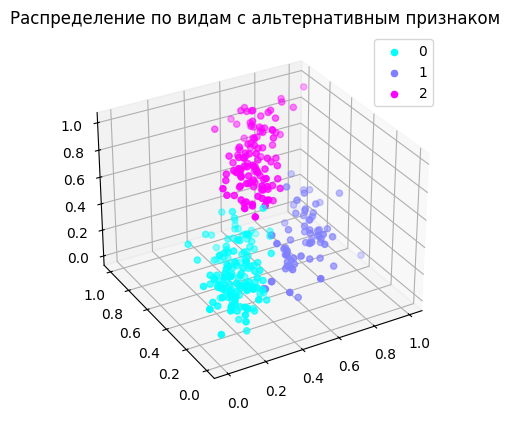

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection="3d")

from matplotlib import colormaps

colors = [colormaps['cool'](i) for i in [0,0.5,0.99]]
colors = iter(colors)
for grp_name, grp_idx in df.groupby(species).groups.items():
    color = next(colors)
    ax1.scatter(df.iloc[grp_idx][ind1], df.iloc[grp_idx][ind2], df.iloc[grp_idx][ind3], color=color, label=grp_name)

ax1.legend()
# fig = df.plot.scatter(ind1, ind2, color=df[species], colormap='cool')
ax1.view_init(elev=30, azim=-120)
plt.title("Распределение по видам с альтернативным признаком")

# 9. построение модели регрессии в 3D

In [29]:
train_input = pd.DataFrame(train, columns=[ind1, ind2, ind3])
test_input = pd.DataFrame(test, columns=[ind1, ind2, ind3])
full_input = pd.DataFrame(df, columns=[ind1, ind2, ind3])

def to_one_hot(dataframe, dimension=3):
    results = np.zeros((len(dataframe), dimension))
    for i, label in enumerate(dataframe.to_numpy()):
        label = label[0]
        results[i, label] = 1.
    return results

train_output = to_one_hot(pd.DataFrame(train, columns=[species]))
test_output = to_one_hot(pd.DataFrame(test, columns=[species]))
full_output = to_one_hot(pd.DataFrame(df, columns=[species]))

In [30]:
train_input = np.asarray(train_input).astype(np.float32)
train_output = np.asarray(train_output).astype(np.float32)
test_input = np.asarray(test_input).astype(np.float32)
test_output = np.asarray(test_output).astype(np.float32)
full_input = np.asarray(full_input).astype(np.float32)
full_output = np.asarray(full_output).astype(np.float32)

In [31]:
normer = tf.keras.layers.Normalization()
normer.adapt(train_input)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=train_input[0].shape),
    normer,
    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dense(32, activation = 'swish'),
    tf.keras.layers.Dense(3, activation = 'softmax'),
])

In [32]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = type(best_optimizer)(learning_rate=0.05),
                metrics = ['accuracy', 'false_positives'])
history = model.fit(train_input, train_output, epochs=1000, verbose=0)

# 10. кривые обучения

Text(0.5, 1.0, "Кривые обучения мультиклассификационной модели (оптимизатор <class 'keras.src.optimizers.rmsprop.RMSprop'>)")

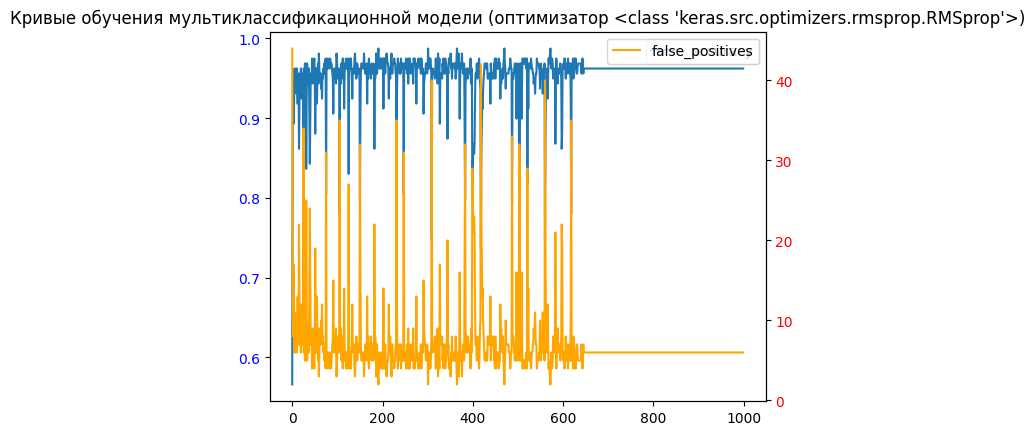

In [33]:
fig = plt.figure()
ax1 = plt.axes()

ax1.plot(history.history['accuracy'], label='accuracy')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(history.history['false_positives'], label='false_positives', color='orange')

ax2.tick_params(axis='y', labelcolor='red')
ax1.legend()
ax2.legend()
plt.title(f"Кривые обучения мультиклассификационной модели (оптимизатор {type(best_optimizer)})")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


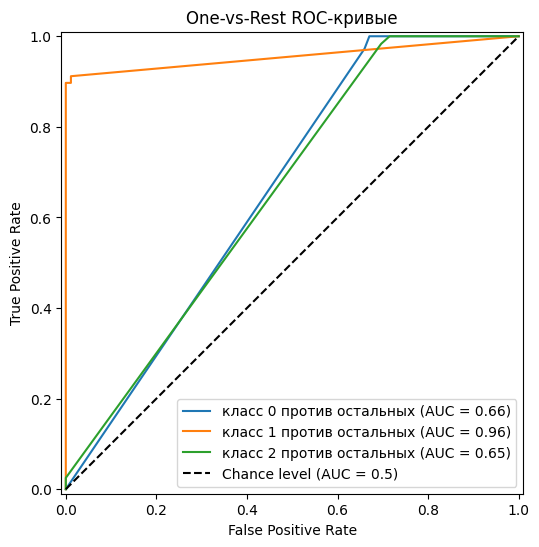

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))

full_prediction = model.predict(full_input)
for i in [0,1,2]:
    RocCurveDisplay.from_predictions(
        full_output[:, i],
        full_prediction[:, i],
        name=f"класс {i} против остальных",
        plot_chance_level=i==2,
        ax=ax
    )
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC-кривые",
)